# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [1]:
# dict for title/res path pair 
# running on pegasus
# 2025-06027 first run

pegasus = {
	"pose_atn_0":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_0/2025-06-27/01-41-04/best_preds",
	"pose_atn_1":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_1/2025-06-27/01-40-27/best_preds",
	"pose_atn_2":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_2/2025-06-27/01-41-04/best_preds",
	"pose_atn_3":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_3/2025-06-27/01-42-44/best_preds",
	"pose_atn_4":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_4/2025-06-27/01-57-08/best_preds",
	"pose_atn_5":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_5/2025-06-27/01-57-08/best_preds",
}

In [2]:
from pathlib import Path

log_path = Path("/work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train")

best_preds_folders = []

pegasus = {}

for p in log_path.rglob("*best_preds*"):
    if p.name == "best_preds" and p.is_dir():
        best_preds_folders.append(p)
        print(f"Found best_preds folder: {p}")

        experiment_name = p.parent.parent.parent.name
        pegasus[experiment_name] = p

print(f"Total best_preds folders found: {len(best_preds_folders)}")

Found best_preds folder: /work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_none_bgr_channel/2025-11-12/17-56-55/best_preds
Found best_preds folder: /work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_se_atn_single_0/2025-11-12/17-57-14/best_preds
Found best_preds folder: /work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_pose_atn_single_3/2025-11-12/17-58-14/best_preds
Found best_preds folder: /work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_pose_atn_multi_1/2025-11-12/17-58-22/best_preds
Found best_preds folder: /work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_pose_atn_single_2/2025-11-12/17-58-14/best_preds
Found best_preds folder: /work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_none_single_5/2

In [3]:
pegasus

{'3dcnn_attn_map_True_none_bgr_channel': PosixPath('/work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_none_bgr_channel/2025-11-12/17-56-55/best_preds'),
 '3dcnn_attn_map_True_se_atn_single_0': PosixPath('/work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_se_atn_single_0/2025-11-12/17-57-14/best_preds'),
 '3dcnn_attn_map_True_pose_atn_single_3': PosixPath('/work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_pose_atn_single_3/2025-11-12/17-58-14/best_preds'),
 '3dcnn_attn_map_True_pose_atn_multi_1': PosixPath('/work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_pose_atn_multi_1/2025-11-12/17-58-22/best_preds'),
 '3dcnn_attn_map_True_pose_atn_single_2': PosixPath('/work/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/train/3dcnn_attn_map_True_pose_atn_single_2/2025-11-12/17-58-14/be

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_none_bgr_channel
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_none_bgr_channel
accuracy: tensor(0.3797)
precision: tensor(0.5429)
recall: tensor(0.3797)
f1_score: tensor(0.3030)
aurroc: tensor(0.5983)
_confusion_matrix: tensor([[7.5707e-01, 1.6414e-03, 2.4129e-01],
        [6.9825e-01, 1.1580e-02, 2.9017e-01],
        [6.2875e-01, 7.0408e-04, 3.7055e-01]])
####################################################################################################


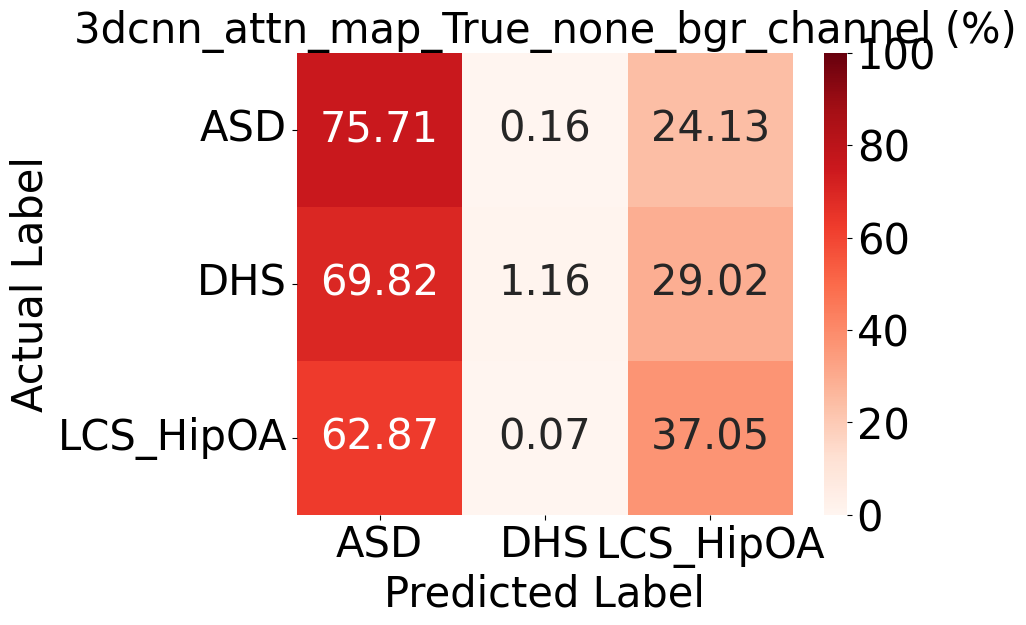

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_none_single_5
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_none_single_5
accuracy: tensor(0.3833)
precision: tensor(0.4470)
recall: tensor(0.3833)
f1_score: tensor(0.3033)
aurroc: tensor(0.5637)
_confusion_matrix: tensor([[0.7727, 0.0014, 0.2259],
        [0.7047, 0.0070, 0.2883],
        [0.6258, 0.0039, 0.3702]])
####################################################################################################


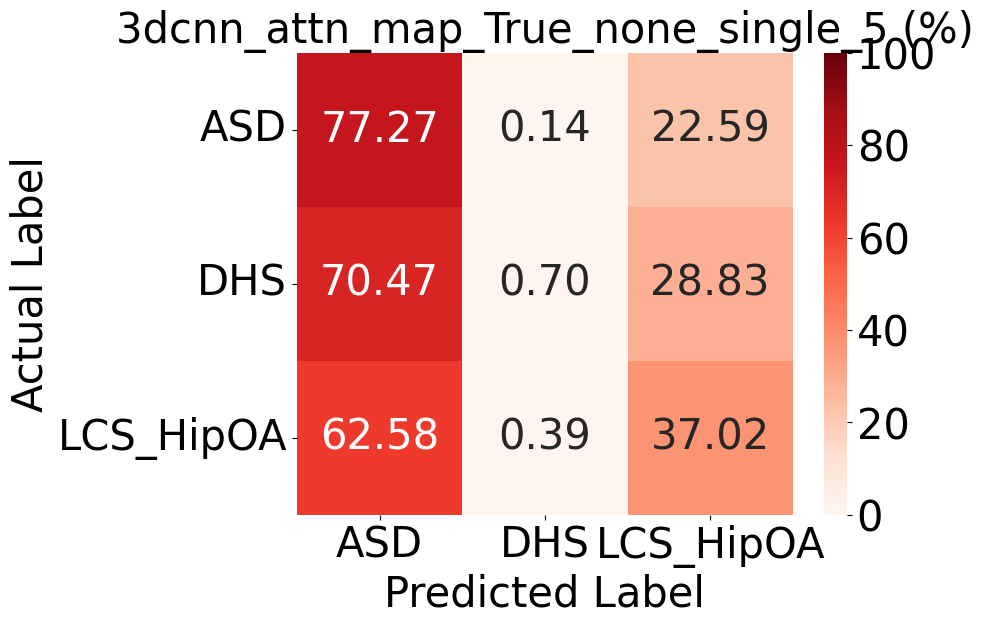

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_multi_0
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_multi_0
accuracy: tensor(0.6912)
precision: tensor(0.7249)
recall: tensor(0.6912)
f1_score: tensor(0.6920)
aurroc: tensor(0.8601)
_confusion_matrix: tensor([[0.5278, 0.1227, 0.3495],
        [0.2148, 0.5867, 0.1986],
        [0.0095, 0.0313, 0.9593]])
####################################################################################################


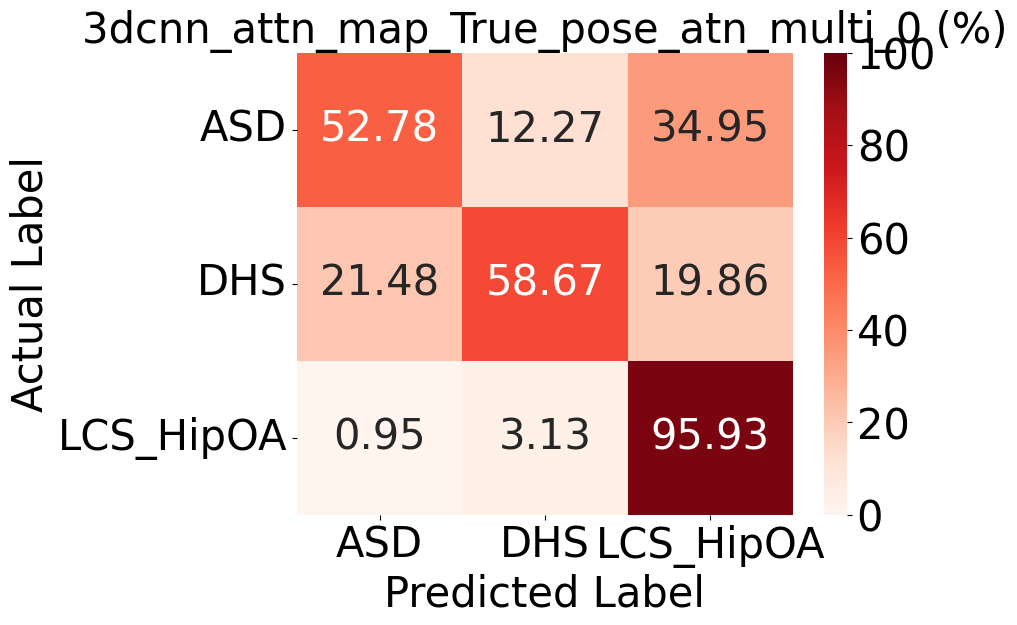

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_multi_1
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_multi_1
accuracy: tensor(0.6979)
precision: tensor(0.7149)
recall: tensor(0.6979)
f1_score: tensor(0.7009)
aurroc: tensor(0.8626)
_confusion_matrix: tensor([[0.6338, 0.1322, 0.2340],
        [0.2241, 0.6046, 0.1713],
        [0.1212, 0.0234, 0.8554]])
####################################################################################################


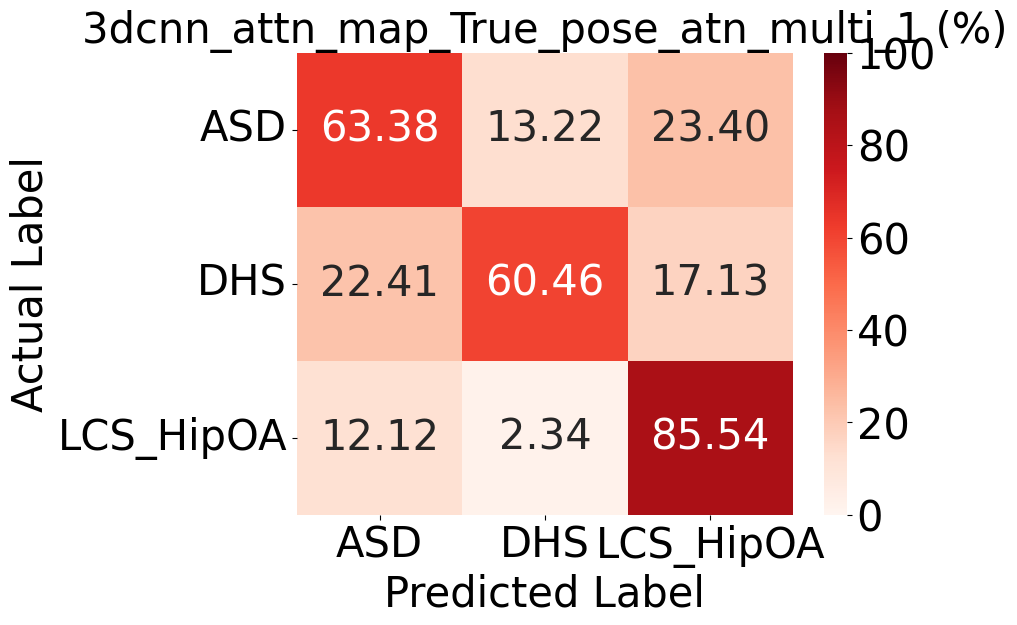

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_multi_2
fold: 9
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_multi_2
accuracy: tensor(0.6772)
precision: tensor(0.7125)
recall: tensor(0.6772)
f1_score: tensor(0.6752)
aurroc: tensor(0.8147)
_confusion_matrix: tensor([[0.8174, 0.0240, 0.1586],
        [0.3266, 0.5379, 0.1356],
        [0.2619, 0.0619, 0.6763]])
####################################################################################################


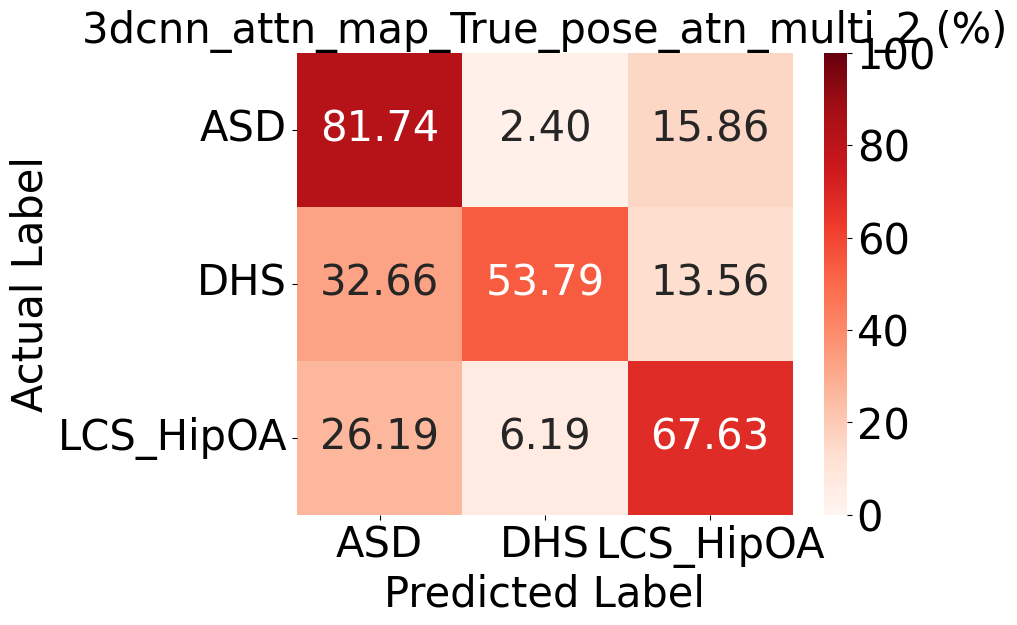

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_multi_3
fold: 8
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_multi_3
accuracy: tensor(0.6703)
precision: tensor(0.7202)
recall: tensor(0.6703)
f1_score: tensor(0.6846)
aurroc: tensor(0.8370)
_confusion_matrix: tensor([[0.5971, 0.0291, 0.3738],
        [0.1440, 0.6233, 0.2326],
        [0.1906, 0.0189, 0.7905]])
####################################################################################################


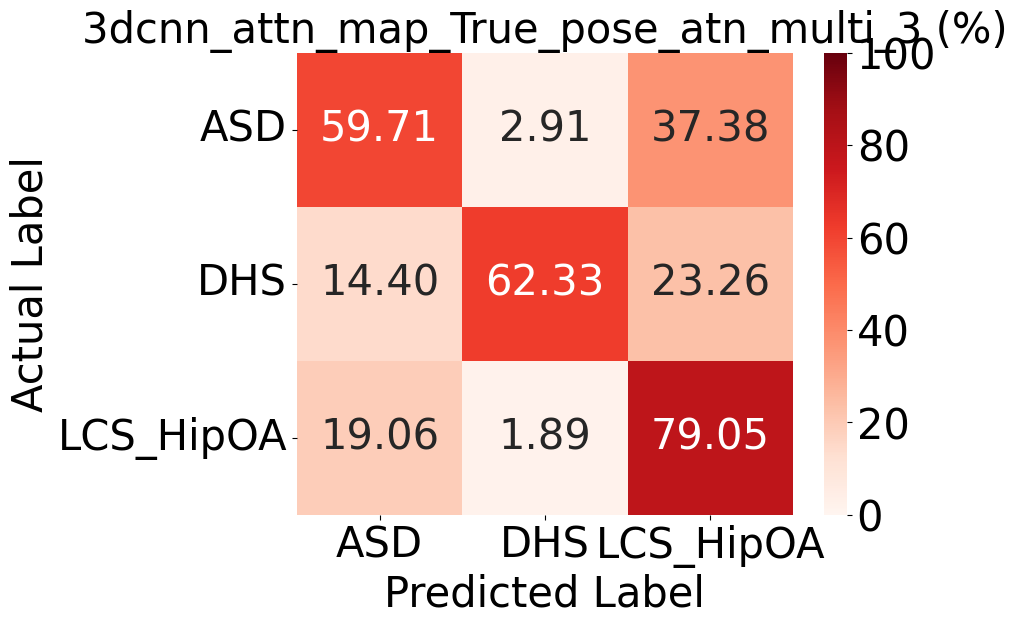

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_multi_4
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_multi_4
accuracy: tensor(0.7285)
precision: tensor(0.7327)
recall: tensor(0.7285)
f1_score: tensor(0.7274)
aurroc: tensor(0.8556)
_confusion_matrix: tensor([[0.7376, 0.1162, 0.1462],
        [0.1812, 0.7471, 0.0717],
        [0.2315, 0.0676, 0.7009]])
####################################################################################################


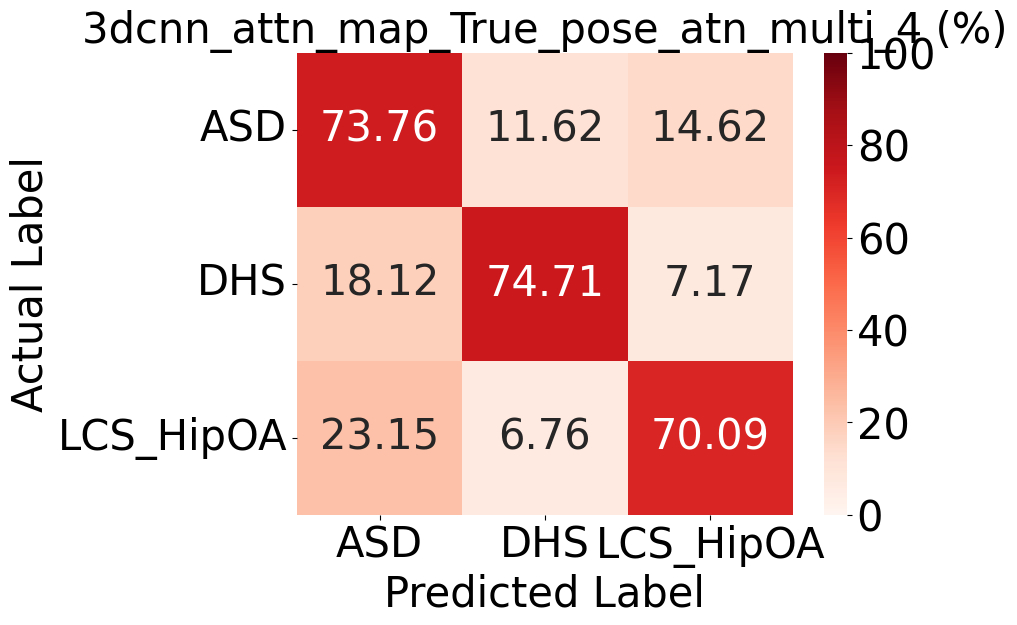

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_single_0
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_single_0
accuracy: tensor(0.6469)
precision: tensor(0.6841)
recall: tensor(0.6469)
f1_score: tensor(0.6501)
aurroc: tensor(0.7925)
_confusion_matrix: tensor([[0.6117, 0.0354, 0.3529],
        [0.2453, 0.4887, 0.2660],
        [0.0752, 0.0846, 0.8402]])
####################################################################################################


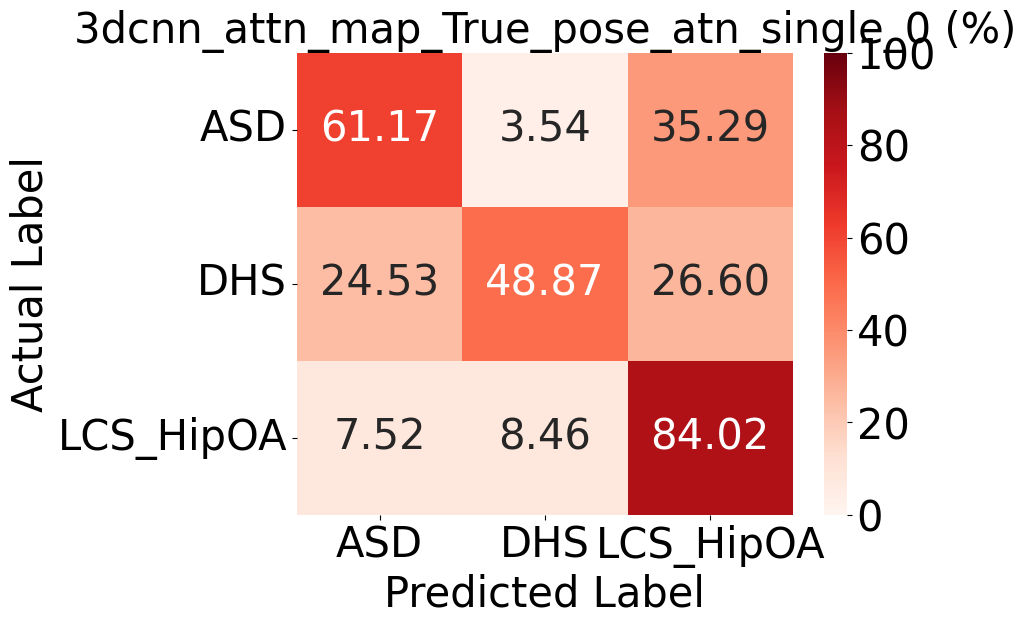

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_single_1
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_single_1
accuracy: tensor(0.7187)
precision: tensor(0.7227)
recall: tensor(0.7187)
f1_score: tensor(0.7188)
aurroc: tensor(0.8695)
_confusion_matrix: tensor([[0.7227, 0.1020, 0.1753],
        [0.2640, 0.6850, 0.0511],
        [0.1470, 0.1046, 0.7484]])
####################################################################################################


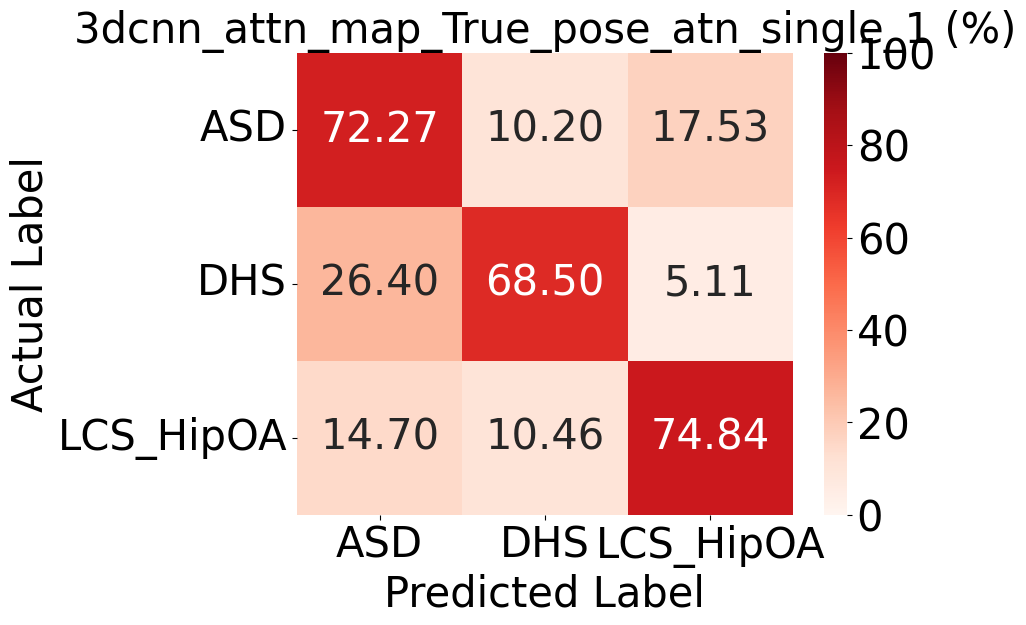

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_single_2
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_single_2
accuracy: tensor(0.7375)
precision: tensor(0.7416)
recall: tensor(0.7375)
f1_score: tensor(0.7388)
aurroc: tensor(0.8717)
_confusion_matrix: tensor([[0.6547, 0.1124, 0.2330],
        [0.1958, 0.7233, 0.0809],
        [0.0751, 0.0902, 0.8346]])
####################################################################################################


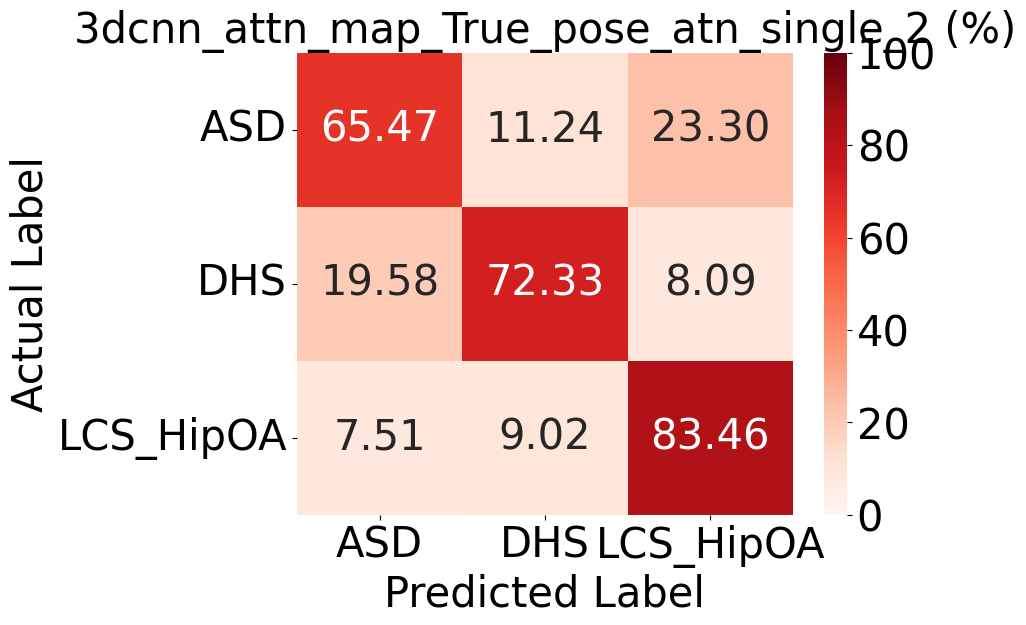

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_single_3
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_single_3
accuracy: tensor(0.6522)
precision: tensor(0.6460)
recall: tensor(0.6522)
f1_score: tensor(0.6426)
aurroc: tensor(0.8132)
_confusion_matrix: tensor([[0.6852, 0.1237, 0.1910],
        [0.1452, 0.7502, 0.1046],
        [0.3089, 0.1701, 0.5210]])
####################################################################################################


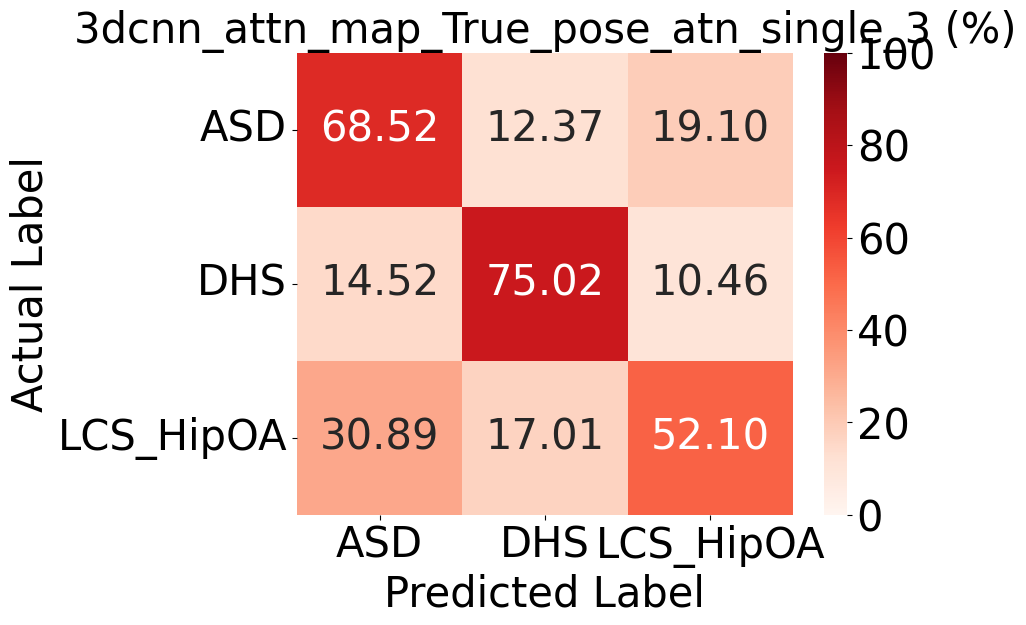

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_pose_atn_single_4
fold: 9
****************************************************************************************************
3dcnn_attn_map_True_pose_atn_single_4
accuracy: tensor(0.7023)
precision: tensor(0.6988)
recall: tensor(0.7023)
f1_score: tensor(0.6878)
aurroc: tensor(0.8198)
_confusion_matrix: tensor([[0.8354, 0.0814, 0.0832],
        [0.2005, 0.6978, 0.1018],
        [0.2483, 0.1779, 0.5738]])
####################################################################################################


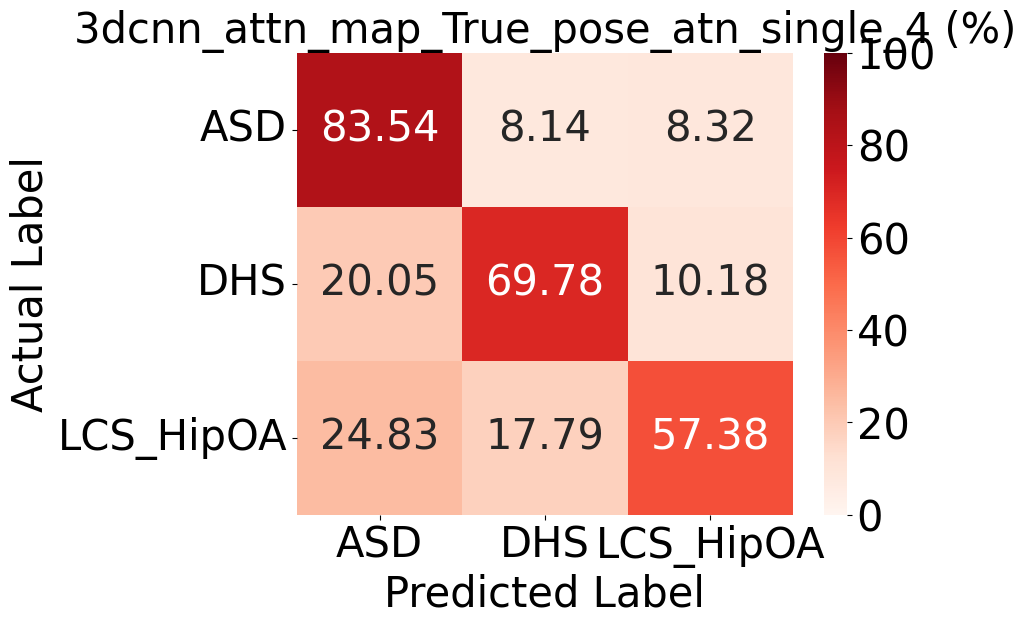

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_se_atn_single_0
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_se_atn_single_0
accuracy: tensor(0.6447)
precision: tensor(0.6865)
recall: tensor(0.6447)
f1_score: tensor(0.6226)
aurroc: tensor(0.8228)
_confusion_matrix: tensor([[0.8552, 0.0933, 0.0515],
        [0.2864, 0.6800, 0.0337],
        [0.4513, 0.1498, 0.3989]])
####################################################################################################


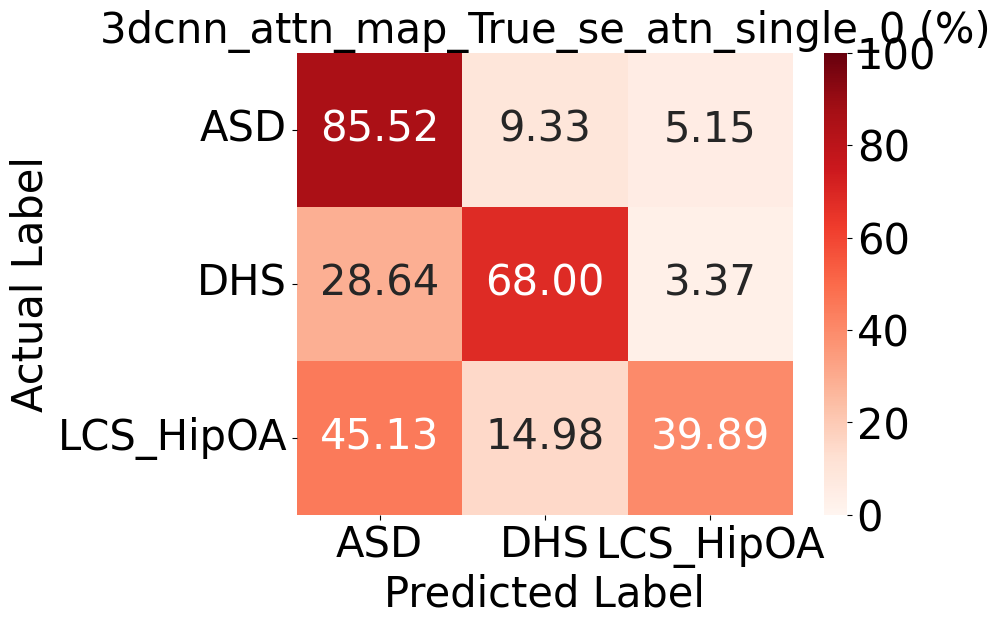

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_se_atn_single_1
fold: 9
****************************************************************************************************
3dcnn_attn_map_True_se_atn_single_1
accuracy: tensor(0.6690)
precision: tensor(0.6729)
recall: tensor(0.6690)
f1_score: tensor(0.6602)
aurroc: tensor(0.8179)
_confusion_matrix: tensor([[0.8162, 0.1161, 0.0677],
        [0.3281, 0.5466, 0.1253],
        [0.1976, 0.1580, 0.6444]])
####################################################################################################


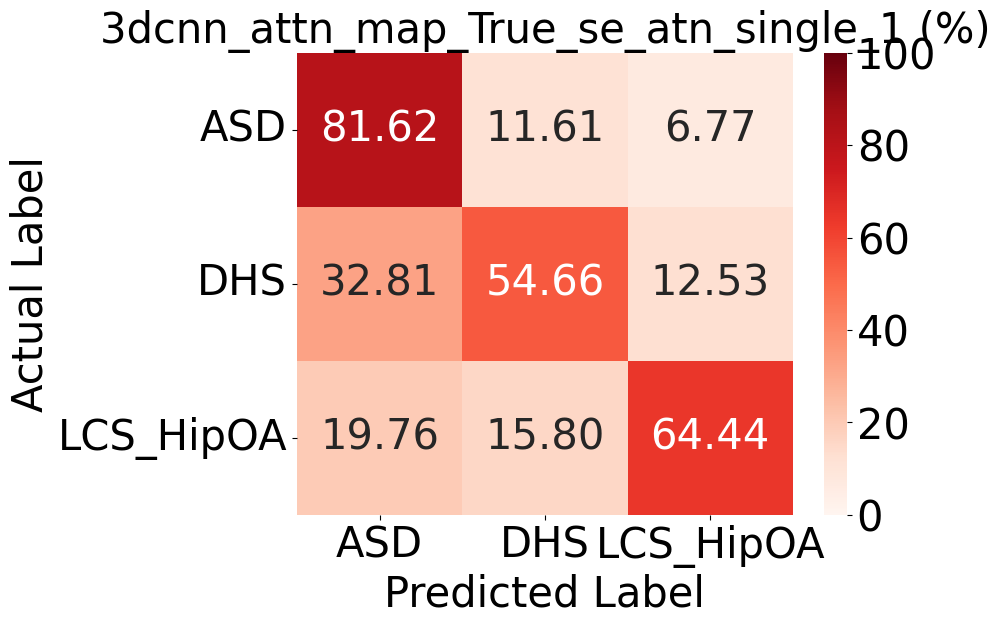

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_se_atn_single_2
fold: 9
****************************************************************************************************
3dcnn_attn_map_True_se_atn_single_2
accuracy: tensor(0.6781)
precision: tensor(0.7168)
recall: tensor(0.6781)
f1_score: tensor(0.6757)
aurroc: tensor(0.8526)
_confusion_matrix: tensor([[0.8158, 0.0782, 0.1061],
        [0.3622, 0.5816, 0.0562],
        [0.3139, 0.0490, 0.6371]])
####################################################################################################


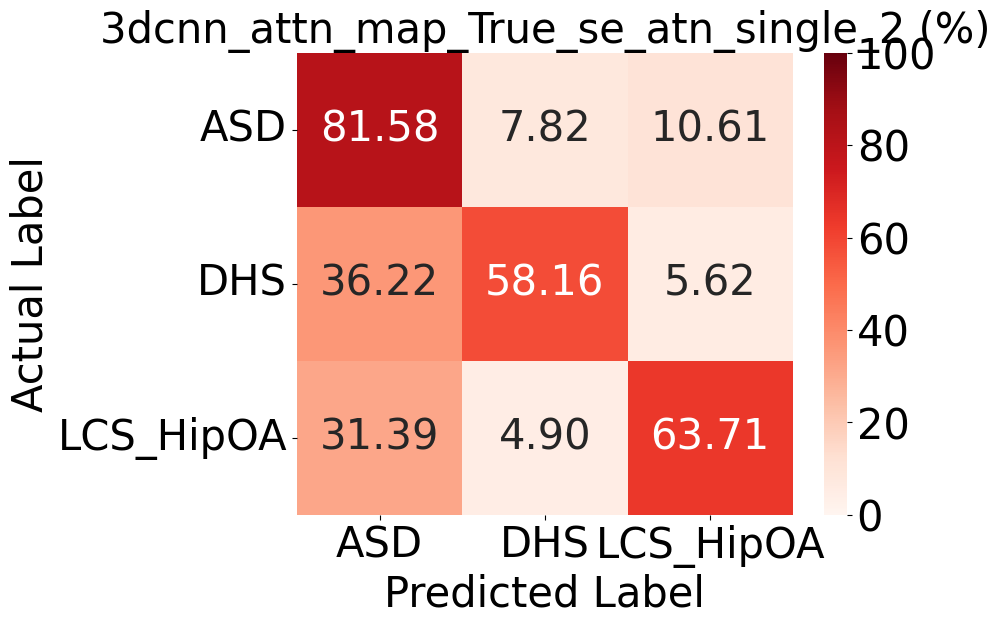

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_se_atn_single_3
fold: 10
****************************************************************************************************
3dcnn_attn_map_True_se_atn_single_3
accuracy: tensor(0.6657)
precision: tensor(0.7162)
recall: tensor(0.6657)
f1_score: tensor(0.6620)
aurroc: tensor(0.8122)
_confusion_matrix: tensor([[0.8503, 0.0701, 0.0797],
        [0.3497, 0.5832, 0.0671],
        [0.3870, 0.0494, 0.5636]])
####################################################################################################


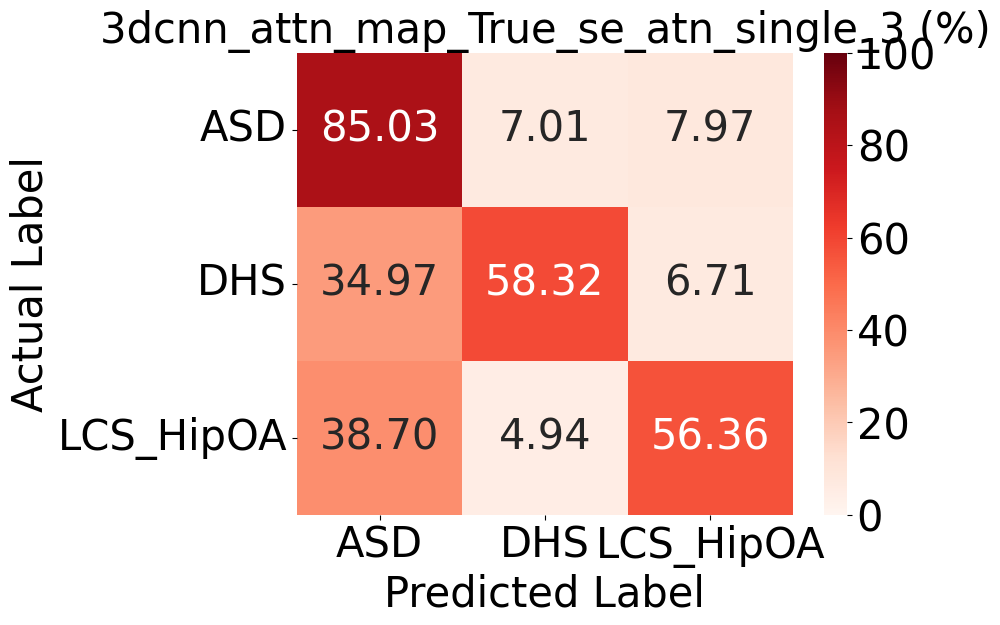

****************************************************************************************************
pegasus, 3dcnn_attn_map_True_se_atn_single_4
fold: 9
****************************************************************************************************
3dcnn_attn_map_True_se_atn_single_4
accuracy: tensor(0.6390)
precision: tensor(0.6792)
recall: tensor(0.6390)
f1_score: tensor(0.6360)
aurroc: tensor(0.8173)
_confusion_matrix: tensor([[0.7899, 0.0546, 0.1555],
        [0.3647, 0.4863, 0.1490],
        [0.3055, 0.0539, 0.6406]])
####################################################################################################


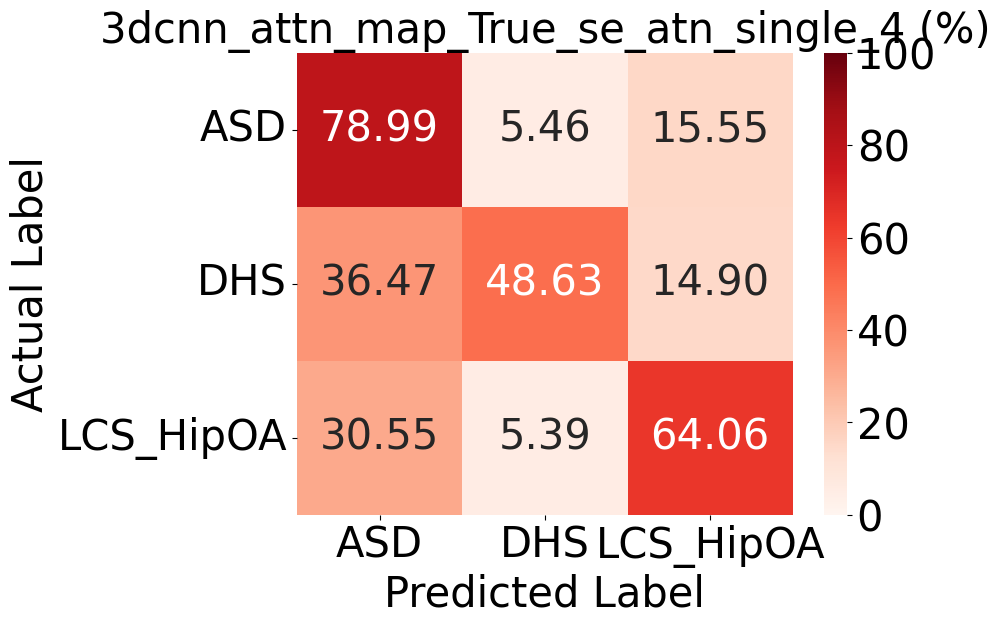

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
from pathlib import Path

from torchmetrics.classification import (
MulticlassAccuracy,
MulticlassPrecision,
MulticlassRecall,
MulticlassF1Score,
MulticlassConfusionMatrix,
MulticlassAUROC,
)

# analysis with title/res path pair

def analysis_with_title_res_path_pair(pair: dict, flag: str = "with_attn_loss"):

	for title, res_path in sorted(pair.items()):
		
		fold = 0
		print('*' * 100)
		print(f"{flag}, {title}")
		all_label = []
		all_pred = []
		
		fold = int(len(list(Path(res_path).iterdir())) / 2 )

		print(f"fold: {fold}")

		for i in range(fold):
			label = torch.load(f"{res_path}/fold_{i}_label.pt", map_location="cpu").to(torch.int)
			pred = torch.load(f"{res_path}/fold_{i}_pred.pt", map_location="cpu")
			all_label.append(label)
			all_pred.append(pred)

		all_label = torch.cat(all_label, dim=0)
		all_pred = torch.cat(all_pred, dim=0)
		
		print('*' * 100)
		print(title)
		confusion_matrix_data = metrics(all_pred, all_label, num_class=3, title=title)
		print('#' * 100)

		plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})
		axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

		# draw confusion matrix
		plt.figure(figsize=(8, 6))
		sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
		# plt.title(f'{title} (%)', fontsize=30)
		plt.title(f"{title} (%)", fontsize=30)
		plt.ylabel('Actual Label', fontsize=30)
		plt.xlabel('Predicted Label', fontsize=30)
		plt.show()
    	

def metrics(all_pred: torch.Tensor, all_label: torch.Tensor, num_class: int = 3, title: str = "") -> torch.Tensor:

	# define metrics 
	_accuracy = MulticlassAccuracy(num_class)
	_precision = MulticlassPrecision(num_class)
	_recall = MulticlassRecall(num_class)
	_f1_score = MulticlassF1Score(num_class)
	_auroc = MulticlassAUROC(num_class)
	_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

	print('accuracy: %s' % _accuracy(all_pred, all_label))
	print('precision: %s' % _precision(all_pred, all_label))
	print('recall: %s' % _recall(all_pred, all_label))
	print('f1_score: %s' % _f1_score(all_pred, all_label))
	print('aurroc: %s' % _auroc(all_pred, all_label))
	print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))

    # write results to txt file
	with open("../logs/pegasus/results.txt", "a") as f:
		
		f.write(f"title: {title}\n")
		f.write(f"accuracy: {_accuracy(all_pred, all_label)}\n")
		f.write(f"precision: {_precision(all_pred, all_label)}\n")
		f.write(f"recall: {_recall(all_pred, all_label)}\n")
		f.write(f"f1_score: {_f1_score(all_pred, all_label)}\n")
		f.write(f"aurroc: {_auroc(all_pred, all_label)}\n")
		f.write(f"_confusion_matrix: {_confusion_matrix(all_pred, all_label)}\n")
		f.write('*' * 100 + "\n")

	return _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

analysis_with_title_res_path_pair(pegasus, flag="pegasus")